<a href="https://colab.research.google.com/github/shroukdiaa/ML_tasks/blob/main/all_tasks_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Task 1

In [24]:
import pandas as pd
data = pd.read_csv('/content/canada_per_capita_income.csv')

In [25]:
print(data.head())

   year  per capita income (US$)
0  1970              3399.299037
1  1971              3768.297935
2  1972              4251.175484
3  1973              4804.463248
4  1974              5576.514583


Visualize the data

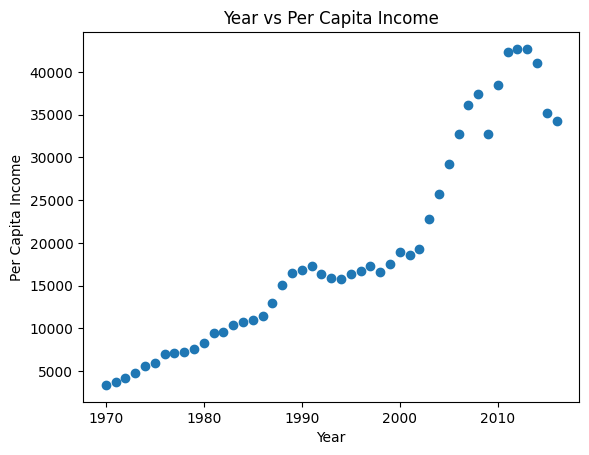

In [26]:
import matplotlib.pyplot as plt

plt.scatter(data['year'], data['per capita income (US$)'])
plt.xlabel('Year')
plt.ylabel('Per Capita Income')
plt.title('Year vs Per Capita Income')
plt.show()

 Splitting the Data

In [27]:
X = data[['year']]
y = data['per capita income (US$)']

train model

In [28]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

LinearRegression()

Predicted

In [29]:
predicted_income = model.predict([[2020]])
print(f"Predicted Per Capita Income for 2020: {predicted_income[0]}")

Predicted Per Capita Income for 2020: 41288.69409441762


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [30]:
m = model.coef_[0]
b = model.intercept_
print(f"Slope (m): {m}, Intercept (b): {b}")


Slope (m): 828.4650752227104, Intercept (b): -1632210.7578554575


R2

In [31]:
r2_score = model.score(X, y)
print(f"R-squared: {r2_score}")

R-squared: 0.890916917957032




---



# Task2

In [32]:
import pandas as pd
import numpy as np

data = pd.read_csv('/content/canada_per_capita_income.csv')
X = data['year'].values
y = data['per capita income (US$)'].values


In [33]:
m = 0
b = 0   #intercept
alpha = 0.0001  # learning rate
epochs = 10000
n = len(X)  # num tests

 Gradient Descent algroithm

In [34]:
for i in range(epochs):
    y_pred = m * X + b
    error = y_pred - y  # error

    dm = (1/n) * np.sum(error * X)  # m
    db = (1/n) * np.sum(error)  # b

    m = m - alpha * dm # new m
    b = b - alpha * db # new b


    if i % 1000 == 0:
        cost = (1/(2*n)) * np.sum(error**2)
        print(f"Epoch {i}, Cost: {cost}, m: {m}, b: {b}")


<ipython-input-34-a3e27ff75ff6>:5: RuntimeWarning: overflow encountered in multiply
  dm = (1/n) * np.sum(error * X)  # m
<ipython-input-34-a3e27ff75ff6>:8: RuntimeWarning: invalid value encountered in scalar subtract
  m = m - alpha * dm # new m


Epoch 0, Cost: 249861765.819221, m: 3786.027074120566, b: 1.8920137063404254
Epoch 1000, Cost: nan, m: nan, b: nan
Epoch 2000, Cost: nan, m: nan, b: nan
Epoch 3000, Cost: nan, m: nan, b: nan
Epoch 4000, Cost: nan, m: nan, b: nan
Epoch 5000, Cost: nan, m: nan, b: nan
Epoch 6000, Cost: nan, m: nan, b: nan
Epoch 7000, Cost: nan, m: nan, b: nan
Epoch 8000, Cost: nan, m: nan, b: nan
Epoch 9000, Cost: nan, m: nan, b: nan


Predicted

In [35]:
year = 2020
predicted_income = m * year + b
print(f"Predicted Per Capita Income for 2020: {predicted_income}")


Predicted Per Capita Income for 2020: nan


Evaluate the Model

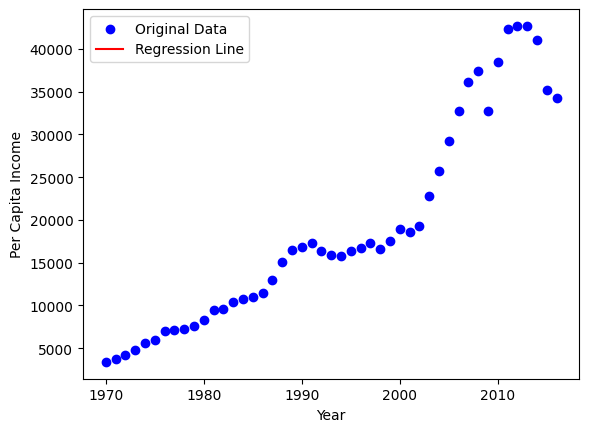

In [36]:
import matplotlib.pyplot as plt

plt.scatter(X, y, color='blue', label='Original Data')

plt.plot(X, m * X + b, color='red', label='Regression Line')

plt.xlabel('Year')
plt.ylabel('Per Capita Income')
plt.legend()
plt.show()


Cost Function

In [37]:
y_pred = m * X + b

#cost
cost = (1/(2*n)) * np.sum((y - y_pred)**2)
print(f"Final Cost (Error): {cost}")


Final Cost (Error): nan


**Polynomial**

Prepare Polynomial Features

In [38]:
def polynomial_features(X, degree):
    poly_X = np.ones((X.shape[0], degree + 1))
    for d in range(1, degree + 1):
        poly_X[:, d] = X ** d
    return poly_X


Define the Gradient Descent Algorithm

In [39]:
def gradient_descent(X, y, degree, learning_rate, iterations):
    m, n = X.shape
    W = np.zeros(n)  # Initialize weights
    losses = []

    for i in range(iterations):
        # Predictions
        y_pred = np.dot(X, W)

        # Loss computation
        loss = (1 / (2 * m)) * np.sum((y_pred - y) ** 2)
        losses.append(loss)

        # Gradient computation
        gradients = (1 / m) * np.dot(X.T, (y_pred - y))

        # Update weights
        W -= learning_rate * gradients

        # Print loss every 100 iterations
        if i % 100 == 0:
            print(f"Iteration {i}, Loss: {loss}")

    return W, losses


Train the Model

1. Prepare data

In [40]:
X = data['year'].values
y = data['per capita income (US$)'].values
X_poly = polynomial_features(X, degree=2)  # For quadratic regression


2. Train using gradient descent

In [41]:
learning_rate = 0.01
iterations = 1000
W, losses = gradient_descent(X_poly, y, degree=2, learning_rate=learning_rate, iterations=iterations)

Iteration 0, Loss: 249861765.819221
Iteration 100, Loss: nan
Iteration 200, Loss: nan
Iteration 300, Loss: nan
Iteration 400, Loss: nan
Iteration 500, Loss: nan
Iteration 600, Loss: nan
Iteration 700, Loss: nan
Iteration 800, Loss: nan
Iteration 900, Loss: nan


<ipython-input-39-730ed30bc1a9>:11: RuntimeWarning: overflow encountered in square
  loss = (1 / (2 * m)) * np.sum((y_pred - y) ** 2)
<ipython-input-39-730ed30bc1a9>:18: RuntimeWarning: invalid value encountered in subtract
  W -= learning_rate * gradients


Predict for 2020

In [42]:
X_test = polynomial_features(np.array([2020]), degree=2)
y_pred_2020 = np.dot(X_test, W)
print(f"Predicted Per Capita Income for 2020: {y_pred_2020[0]}")

Predicted Per Capita Income for 2020: nan


Plot the Polynomial Fit

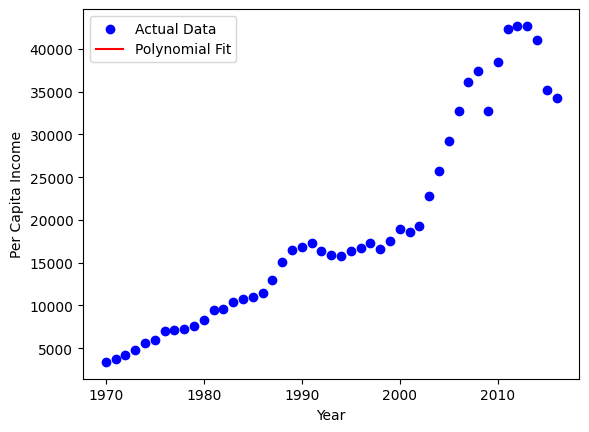

In [43]:
plt.scatter(X, y, color='blue', label='Actual Data')
X_range = np.linspace(min(X), max(X), 100)
X_range_poly = polynomial_features(X_range, degree=2)
y_range_pred = np.dot(X_range_poly, W)
plt.plot(X_range, y_range_pred, color='red', label='Polynomial Fit')
plt.xlabel('Year')
plt.ylabel('Per Capita Income')
plt.legend()
plt.show()




---



# Task 3

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [49]:
data = pd.read_csv('/content/Ice_cream selling data (1)_task3.csv')
print(data.head())

   Temperature (°C)  Ice Cream Sales (units)
0         -4.662263                41.842986
1         -4.316559                34.661120
2         -4.213985                39.383001
3         -3.949661                37.539845
4         -3.578554                32.284531


In [50]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Temperature (°C)         49 non-null     float64
 1   Ice Cream Sales (units)  49 non-null     float64
dtypes: float64(2)
memory usage: 912.0 bytes
None


Visualization

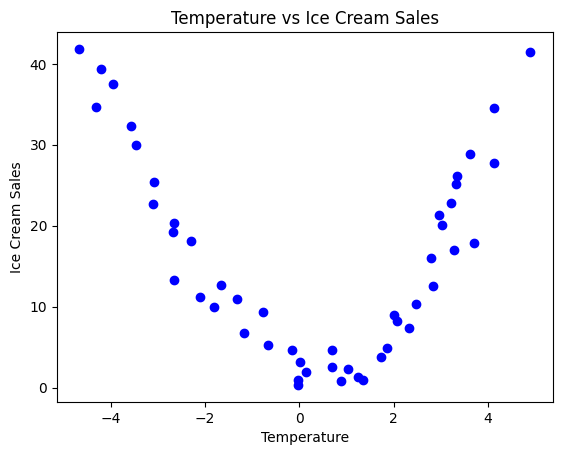

In [54]:
plt.scatter(data['Temperature (°C)'], data['Ice Cream Sales (units)'], color='blue')
plt.xlabel('Temperature')
plt.ylabel('Ice Cream Sales')
plt.title('Temperature vs Ice Cream Sales')
plt.show()

Linear Regression

In [56]:
def simple_linear_regression(X, y, learning_rate, iterations):
    m = len(y)
    w0, w1 = 0, 0
    losses = []

    for i in range(iterations):
        y_pred = w0 + w1 * X
        loss = (1 / (2 * m)) * np.sum((y_pred - y) ** 2)
        losses.append(loss)

        # Update weights
        w0 -= learning_rate * np.sum(y_pred - y) / m
        w1 -= learning_rate * np.sum((y_pred - y) * X) / m

        if i % 100 == 0:
            print(f"Iteration {i}: Loss = {loss}")

    return w0, w1, losses


Train model

In [59]:
X = data['Temperature (°C)'].values
y = data['Ice Cream Sales (units)'].values
learning_rate = 0.01
iterations = 1000

w0, w1, losses = simple_linear_regression(X, y, learning_rate, iterations)
print(f"Final weights: w0 = {w0}, w1 = {w1}")

Iteration 0: Loss = 200.1657022610906
Iteration 100: Loss = 89.08011921346221
Iteration 200: Loss = 73.83944397325111
Iteration 300: Loss = 71.74789260152214
Iteration 400: Loss = 71.46085891867398
Iteration 500: Loss = 71.4214679019373
Iteration 600: Loss = 71.41606208271723
Iteration 700: Loss = 71.41532021607198
Iteration 800: Loss = 71.41521840613403
Iteration 900: Loss = 71.41520443426518
Final weights: w0 = 16.120964443163842, w1 = -0.7964227863038748


Predicted

linear

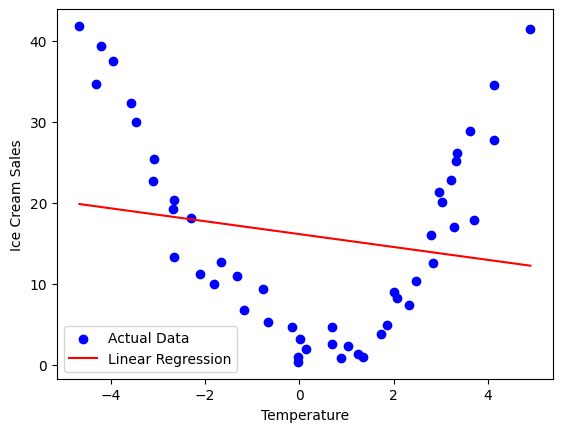

In [60]:
def predict(X, w0, w1):
    return w0 + w1 * X

y_pred = predict(X, w0, w1)

plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', label='Linear Regression')
plt.xlabel('Temperature')
plt.ylabel('Ice Cream Sales')
plt.legend()
plt.show()


Polynomial

In [61]:
def polynomial_features(X, degree):
    poly_X = np.ones((X.shape[0], degree + 1))
    for d in range(1, degree + 1):
        poly_X[:, d] = X ** d
    return poly_X


implement

In [62]:
def polynomial_regression(X, y, degree, learning_rate, iterations):
    m, n = X.shape
    W = np.zeros(n)
    losses = []

    for i in range(iterations):
        y_pred = np.dot(X, W)
        loss = (1 / (2 * m)) * np.sum((y_pred - y) ** 2)
        losses.append(loss)

        gradients = (1 / m) * np.dot(X.T, (y_pred - y))
        W -= learning_rate * gradients

        if i % 100 == 0:
            print(f"Iteration {i}: Loss = {loss}")

    return W, losses


train model by polunomial

In [63]:
degree = 2
X_poly = polynomial_features(X, degree)

W, losses_poly = polynomial_regression(X_poly, y, degree, learning_rate, iterations)
print(f"Final weights: {W}")

Iteration 0: Loss = 200.1657022610906
Iteration 100: Loss = 5.7194994373477135
Iteration 200: Loss = 5.305441981218114
Iteration 300: Loss = 5.130200911387151
Iteration 400: Loss = 5.056033673550367
Iteration 500: Loss = 5.024643890472379
Iteration 600: Loss = 5.011358799771667
Iteration 700: Loss = 5.0057361538780105
Iteration 800: Loss = 5.003356482744585
Iteration 900: Loss = 5.002349335075965
Final weights: [ 2.91371024 -0.82406849  1.83252063]


Predict Polynomial

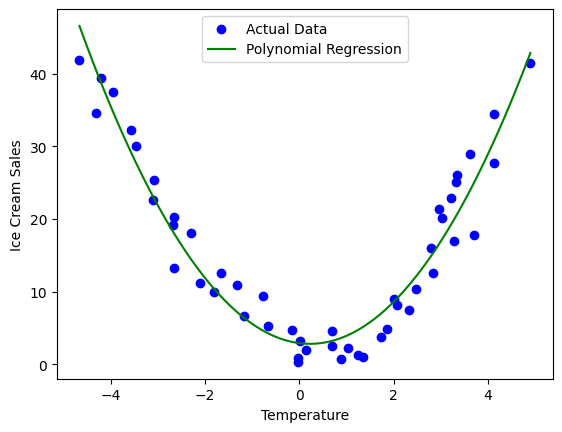

In [64]:
def predict_polynomial(X, W):
    return np.dot(X, W)

X_test = np.linspace(min(X), max(X), 100).reshape(-1, 1)
X_test_poly = polynomial_features(X_test.flatten(), degree)
y_test_pred = predict_polynomial(X_test_poly, W)

plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X_test, y_test_pred, color='green', label='Polynomial Regression')
plt.xlabel('Temperature')
plt.ylabel('Ice Cream Sales')
plt.legend()
plt.show()




---



# Task 3 part 2

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [66]:
train_data = pd.read_csv('/content/train_task3.2.csv')
print(train_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [67]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [68]:
print(train_data.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


Missing values

In [69]:
print(train_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


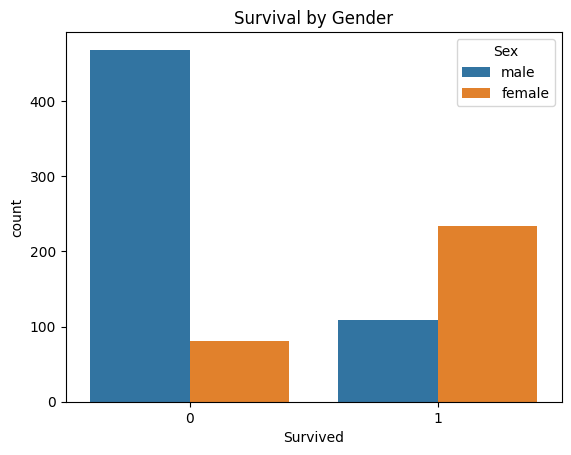

In [70]:
sns.countplot(data=train_data, x='Survived', hue='Sex')
plt.title('Survival by Gender')
plt.show()

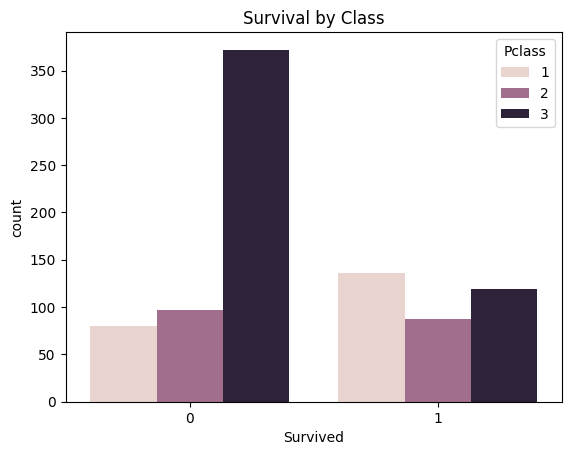

In [71]:
sns.countplot(data=train_data, x='Survived', hue='Pclass')
plt.title('Survival by Class')
plt.show()

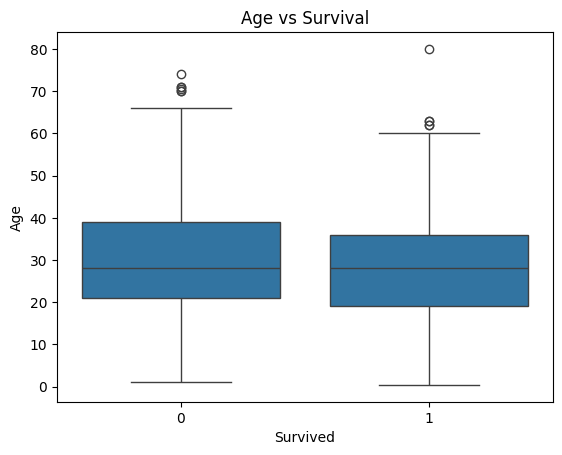

In [74]:
sns.boxplot(data=train_data, x='Survived', y='Age')
plt.title('Age vs Survival')
plt.show()

Preprocessing Missing values

In [75]:
train_data['Age'].fillna(train_data['Age'].mean(), inplace=True)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)


<ipython-input-75-1df11c4edc7c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(train_data['Age'].mean(), inplace=True)
<ipython-input-75-1df11c4edc7c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [76]:
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})
train_data['Embarked'] = train_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [77]:
train_data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

Build model

In [78]:
X = train_data.drop(['Survived'], axis=1)
y = train_data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Predict Model

In [80]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)


Accuracy: 0.7988826815642458
Confusion Matrix:
[[90 15]
 [21 53]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



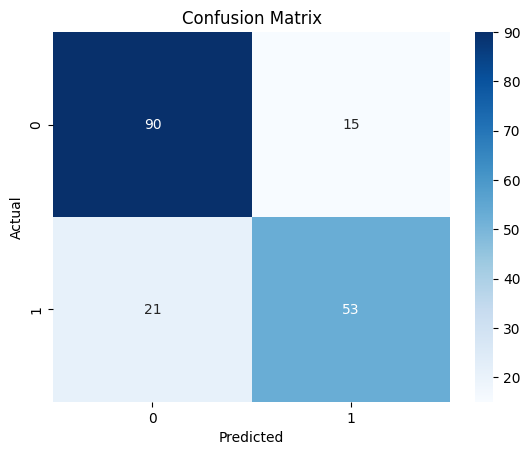

In [81]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

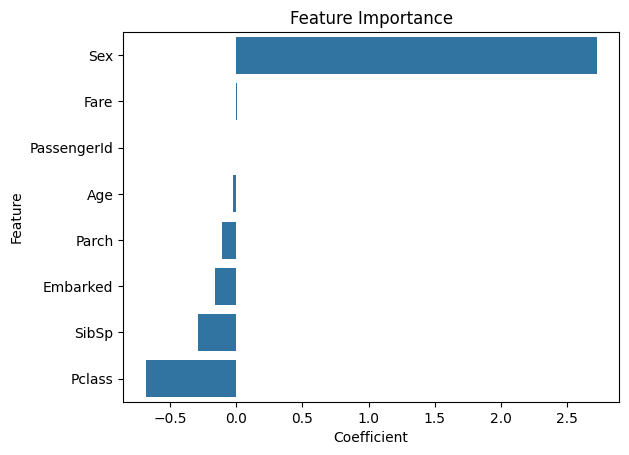

In [82]:
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

sns.barplot(data=feature_importance, x='Coefficient', y='Feature')
plt.title('Feature Importance')
plt.show()


In [83]:
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch']


# Task 4